In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv("../data/heart_disease.csv")
df["ca"].fillna(df["ca"].mean(),inplace=True)
df['thal'].fillna(df["thal"].mean(),inplace=True)
X = df.drop("num", axis=1)
y = df["num"]

C:\Users\AIO\AppData\Local\Temp\ipykernel_1820\441687631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(df["ca"].mean(),inplace=True)
C:\Users\AIO\AppData\Local\Temp\ipykernel_1820\441687631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

Feature mportance (Random Forest):
 thalach     0.132721
oldpeak     0.117086
age         0.113117
chol        0.111713
ca          0.098518
trestbps    0.097332
thal        0.085348
cp          0.080555
exang       0.048784
slope       0.038274
restecg     0.028931
sex         0.028727
fbs         0.018894
dtype: float64


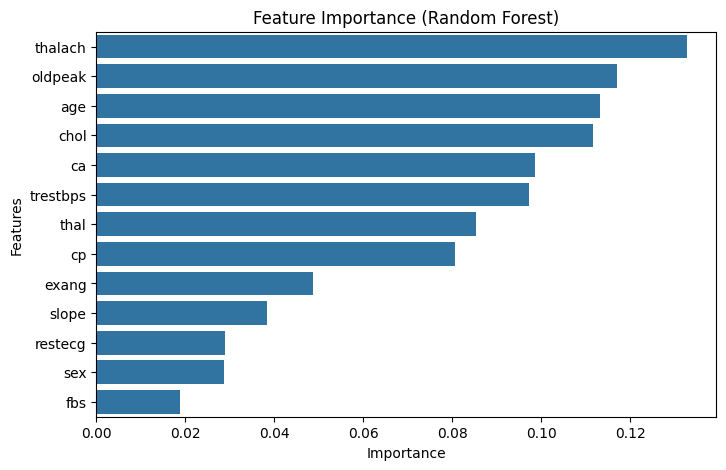

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(X,y)
#Get feature importance
feature_importances=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print("Feature mportance (Random Forest):\n",feature_importances)
# plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression(max_iter=5000)  
rfe = RFE(log_reg, n_features_to_select=5)  
fit = rfe.fit(X_scaled, y)

print("Selected Features by RFE:", X.columns[fit.support_])


Selected Features by RFE: Index(['cp', 'restecg', 'oldpeak', 'ca', 'thal'], dtype='object')


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2

# Scale features to [0,1] for chi-square
X_scaled_chi = MinMaxScaler().fit_transform(X)

# Apply chi-square test
chi_scores, p_values = chi2(X_scaled_chi, y)
chi_results = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print("Chi-Square Scores:\n", chi_results)


Chi-Square Scores:
 thal        48.012868
exang       41.534482
ca          35.395825
oldpeak     16.451213
slope       14.046618
cp           8.234094
sex          7.499223
restecg      7.028775
fbs          6.658223
thalach      3.133976
age          1.244886
trestbps     0.622014
chol         0.175931
dtype: float64


In [29]:
# Example: pick top features consistently ranked high across methods
final_features = ['cp', 'thalach', 'oldpeak', 'ca', 'thal']
X_final = X[final_features]
print("Final dataset with selected features:\n", X_final.head())


Final dataset with selected features:
    cp  thalach  oldpeak   ca  thal
0   1      150      2.3  0.0   6.0
1   4      108      1.5  3.0   3.0
2   4      129      2.6  2.0   7.0
3   3      187      3.5  0.0   3.0
4   2      172      1.4  0.0   3.0
